# MACHINE LEARNING PRACTICAL EXAM

In [24]:
# importing neccessary libraries for ML model and parameter tuning
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from zipfile import ZipFile
import joblib

## 1. Preliminary Data Analysis and Cleaning Objectives To load, inspect, and clean the dataset.Instructions

### 1. Download, unzip and load the data folder. Select the winequality-white.csv file. Load it as white-wine.csv..

In [25]:
# file path
path=r"C:\Users\owolabi michael\Downloads\wine+quality.zip"

# Extract and checking the zip file for file names
with ZipFile(path, 'r') as zip_ref:
    zip_ref.printdir()
data= pd

File Name                                             Modified             Size
winequality-red.csv                            2023-05-22 22:24:00        84199
winequality-white.csv                          2023-05-22 22:24:00       264426
winequality.names                              2023-05-22 22:24:00         3305


### 2. Display the first 6 rows and dataset shape.

In [26]:
# accessing the particular dataset need
with ZipFile(path) as zip_ref:
    with zip_ref.open("winequality-white.csv") as f:
        white_wine= pd.read_csv(f, sep=";")

white_wine.head(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


### 3. Check for missing values and handle them appropriately.

In [27]:
# let check the missing values
white_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 4. Check for duplicates and remove them if necessary.


In [28]:
# checking duplicate
white_wine.duplicated().sum()


np.int64(937)

In [29]:
# let remove the duplicate
white_wine= white_wine.drop_duplicates()

# checking if removal was successful
white_wine.duplicated().sum()

np.int64(0)

### 5. Verify data types and correct them if needed.


In [30]:
# verify data types
white_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### 6. Provide a brief markdown summary of all data cleaning actions taken.

## Summary of Data Cleaning Actions Taken

I started from checking for misisng value and no empty cell was found. I also check for duplicate and 937 duplicated data was found and removed. After removing duplicates, I checked to confirm that no duplicate records remained. The data types of each column were verified to ensure they were appropriate for analysis. Any necessary corrections to data types were made to facilitate accurate computations and analyses in subsequent steps. Overall, these actions were aimed at preparing a clean and reliable dataset for further analysis.

## 2. Exploratory Data Analysis (EDA) and Scaling Objectives To explore the dataset through univariate analysis on the features, and correlation of target and features only, and prepare it for modeling through scaling.


### 1. Perform univariate analysis on all numerical features (use any of histograms, boxplots, or countplots).


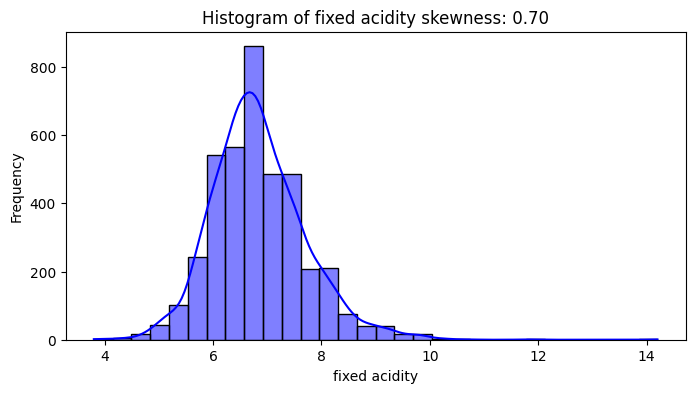

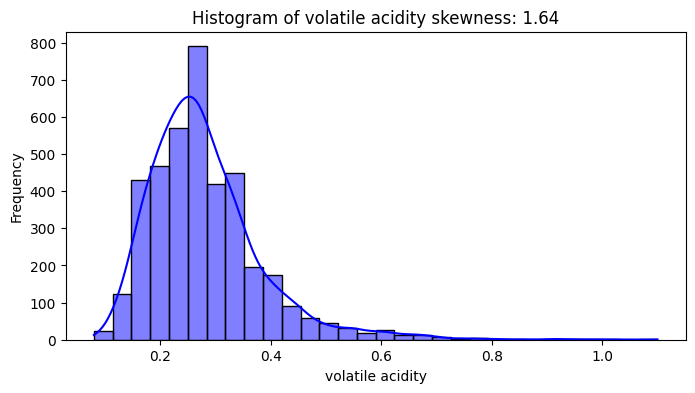

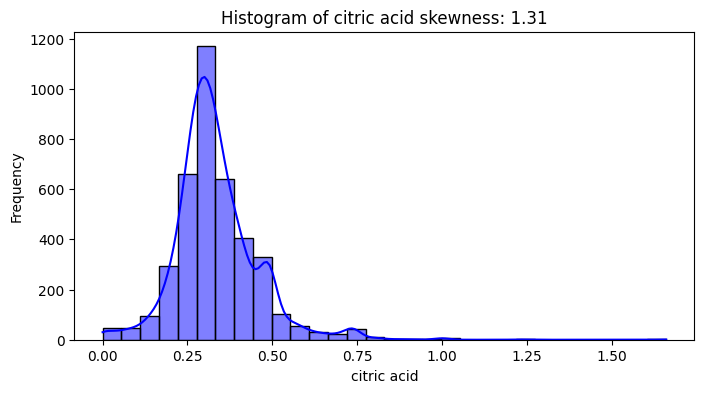

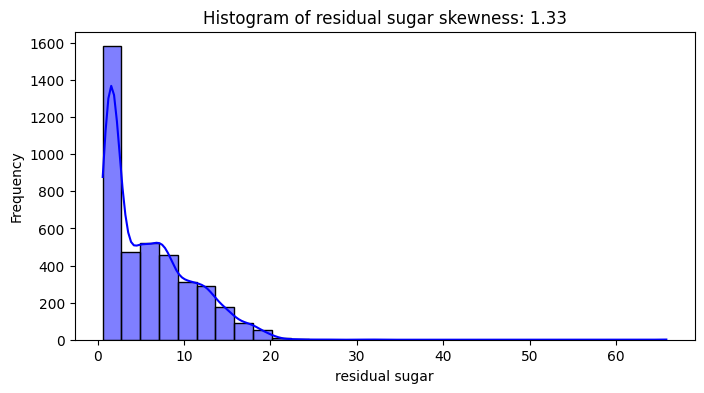

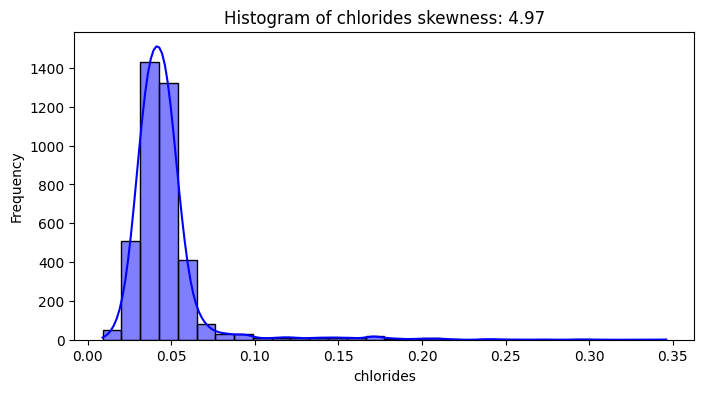

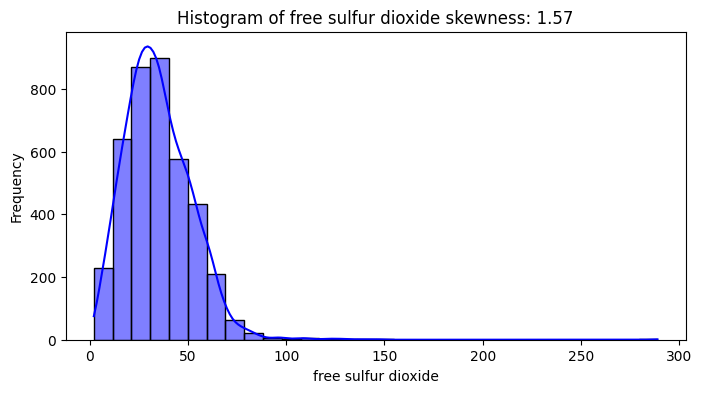

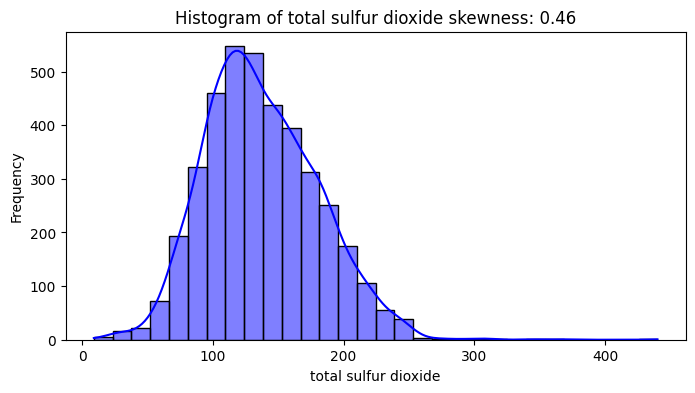

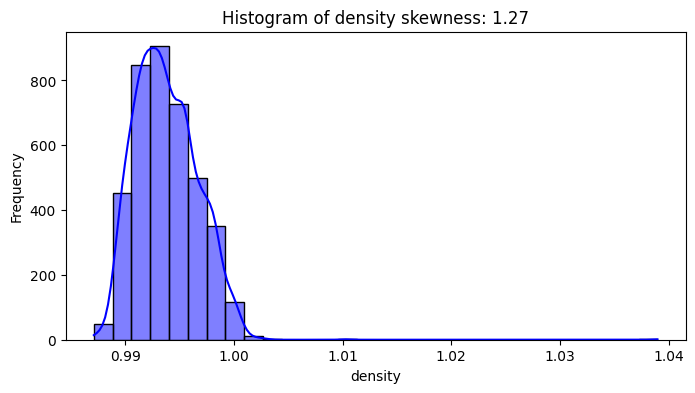

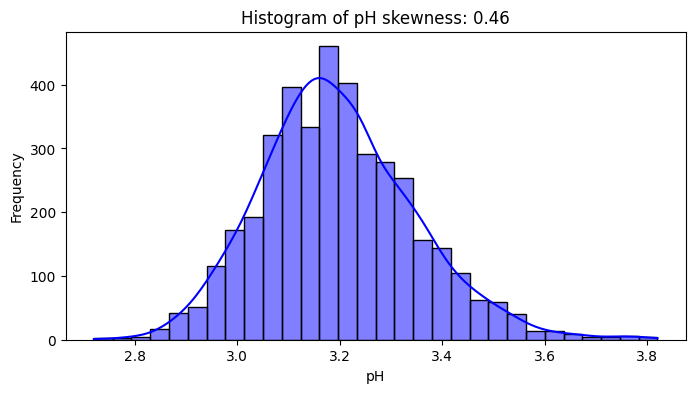

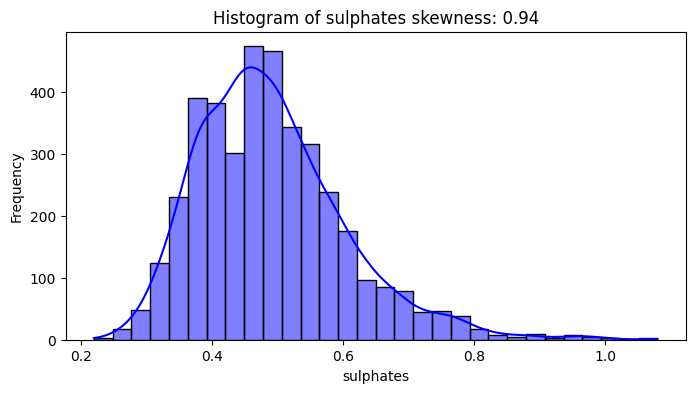

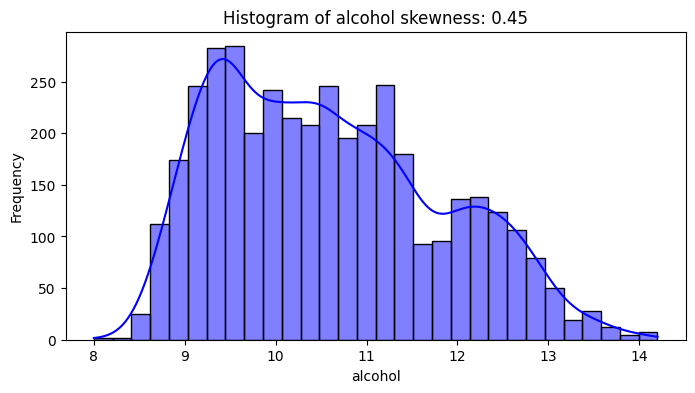

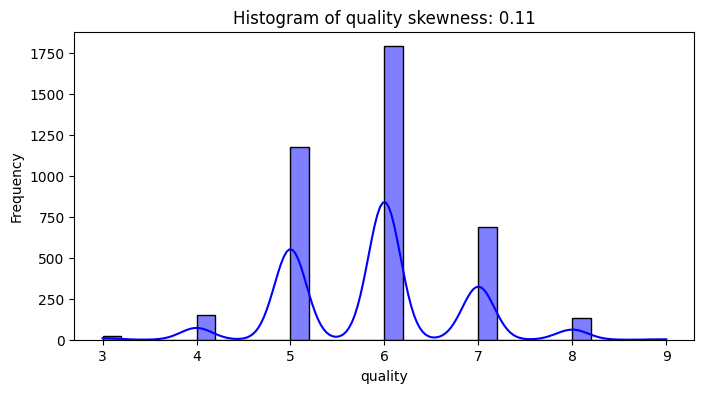

In [31]:
# let me perform univariate analysis of all numerical feature using histograms

# get our numerical column
num_col= white_wine.select_dtypes(include='number').columns
def plot_histograms(data, columns):
    # plot histograms for each numerical column using seaborn
    for col in columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(data[col], bins=30, kde=True, color='blue')
        plt.title(f'Histogram of {col} skewness: {data[col].skew():.2f}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
    
# plot histograms for numerical columns
plot_histograms(white_wine, num_col)

### 2. Examine the correlation of each feature with the target variable (quality).


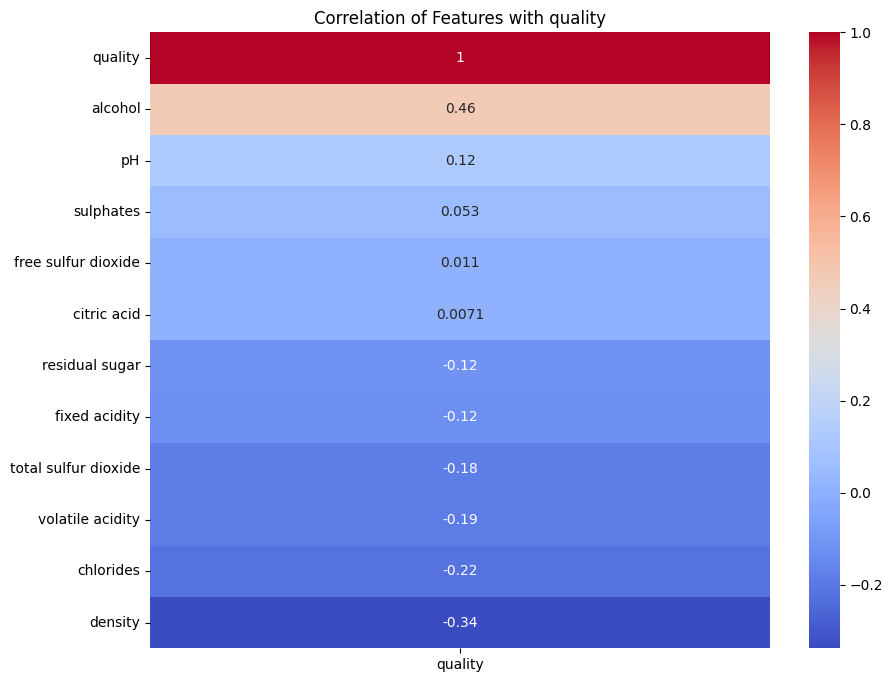

In [32]:
# let define a function examine the correlation with the target
def corr_with_target(data, target_col):
    # compute the correlation matrix
    corr_matrix = data.corr()
    
    # get the correlation of each feature with the target column using heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix[[target_col]].sort_values(by=target_col, ascending=False), annot=True, cmap='coolwarm')
    plt.title(f'Correlation of Features with {target_col}')
    plt.show()
# call the function
target_correlation = corr_with_target(white_wine, 'quality')



### 3. Map the quality column into categorical classes as follows:
    9- Best
    8 - Best
    7 - Good
    6- Good
    5 - Average
    4 - Bad
    3 - Bad


In [33]:
# map quality column to binary values [ 9- Best, 8-Good, 7-Good, 6-Average, 5-Average, 4-Bad, 3-Bad]
white_wine.replace({'quality':{9:"Best",8:"Best", 7:"Good",6:"Good",5:"Average",4:"Bad",3:"Bad"}}, inplace=True)


### 4. Ensure this mapped categorical target is used for all subsequent modeling steps.


In [34]:
# Ensure this mapped categorical target is used for all subsequent modeling steps.
white_wine['quality'].value_counts()

quality
Good       2477
Average    1175
Bad         173
Best        136
Name: count, dtype: int64


### 5. Split the dataset into features x and target y.


In [35]:
# Spliting the dataset into features x and target y.
X=white_wine.drop('quality', axis=1)
y= white_wine['quality']


### 6. Apply appropriate scaling (StandardScaler or MinMaxScaler) to all numerical features.


In [36]:
# applying min max scaler to scale the feature columns
scaler= MinMaxScaler()
X_scaled= scaler.fit_transform(X)

## 3. Build a Base Classification Model
Objectives To establish a simple baseline classification model.


### 1. Split the data into training and testing sets (e.g., 80/20).


In [37]:
# Spliting the data into training and testing sets (e.g., 80/20).
X_train, X_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

### 2. Train a simple model such as Logistic Regression or Decision Tree Classifier.


In [38]:
# simple model using Logistic Regression
log_reg= LogisticRegression()
log_reg.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### 3. Evaluate the model using Accuracy, Precision, Recall, F1-score, and a Confusion Matrix.


Accuracy:0.68
Classification Report:
               precision    recall  f1-score   support

     Average       0.57      0.46      0.51       235
         Bad       0.00      0.00      0.00        35
        Best       0.00      0.00      0.00        27
        Good       0.72      0.87      0.79       496

    accuracy                           0.68       793
   macro avg       0.32      0.33      0.32       793
weighted avg       0.62      0.68      0.64       793



C:\Users\owolabi michael\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\owolabi michael\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\owolabi michael\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

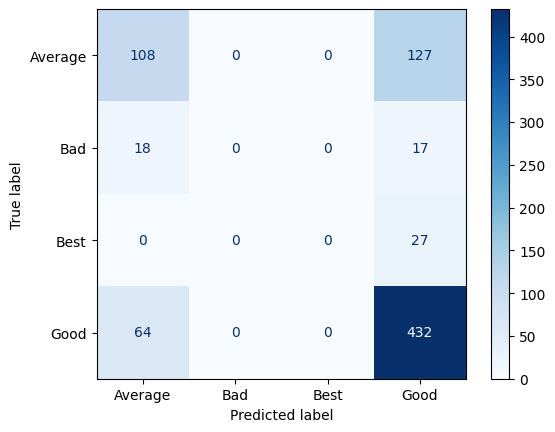

In [39]:
# evaluating the model using Accuracy, Precision, Recall, F1-score, and a Confusion Matrix.
y_pred= log_reg.predict(X_test)
accuracy= accuracy_score(y_test, y_pred)
class_report= classification_report(y_test, y_pred)
conf_matrix= confusion_matrix(y_test, y_pred)
conf_matrix_display= ConfusionMatrixDisplay(confusion_matrix= conf_matrix, display_labels= log_reg.classes_)
conf_matrix_display.plot(cmap= plt.cm.Blues)

print(f"Accuracy:{accuracy:.2f}")
print("Classification Report:\n", class_report)

### 4. Provide a short interpretation of what the metrics mean in relation to the model's predictive ability.


**Interpretation of Model Metrics**
The accuracy of the Logistic Regression model is 68%, indicating that it correctly predicts the wine quality category for 68% of the test samples.
However, the precision and recall for the 'Bad' and 'Best' categories are both 0, suggesting that the model struggles to identify these classes accurately.
The 'Good' category shows better performance with a precision of 72% and a recall of 87%, indicating that the model is more effective at predicting this class. 
Overall, while the model performs reasonably well for the 'Good' category, it requires improvement in distinguishing between all quality levels to enhance its predictive ability.

### 4. Build and Compare Multiple Models
Objectives To build and compare different classification algorithms and identify the best-performing one.

In [40]:
# let's list of different models to compare
models= { "Random Forest": RandomForestClassifier(),
         "Decision Tree": DecisionTreeClassifier(),
        "K Nearest Neighbor": KNeighborsClassifier()
        }


### 1. Train at least three different classification models (e.g., Random Forest, K-Nearest Neighbors, Gradient Boosting, Support Vector Machine).


In [41]:
# initialize a dictionary to store the models results

results={}
for model_name, model in models.items():
    print(f"{model_name} is in training section...")
    model.fit(X_train,y_train)
    y_pred= model.predict(X_test)
    accuracy= accuracy_score(y_test,y_pred)
    class_report= classification_report(y_test,y_pred)
    print(class_report)
    print(f"Accuracy of {model_name}: {accuracy:.2f}")
    print(f"{model_name} Completed.")
    print("===============================\n")

Random Forest is in training section...
              precision    recall  f1-score   support

     Average       0.60      0.57      0.59       235
         Bad       0.67      0.11      0.20        35
        Best       1.00      0.04      0.07        27
        Good       0.76      0.86      0.81       496

    accuracy                           0.72       793
   macro avg       0.76      0.40      0.42       793
weighted avg       0.72      0.72      0.69       793

Accuracy of Random Forest: 0.72
Random Forest Completed.

Decision Tree is in training section...
              precision    recall  f1-score   support

     Average       0.48      0.53      0.51       235
         Bad       0.21      0.20      0.21        35
        Best       0.11      0.15      0.12        27
        Good       0.72      0.68      0.70       496

    accuracy                           0.60       793
   macro avg       0.38      0.39      0.38       793
weighted avg       0.61      0.60      0.60    

### 2. Evaluate each model using the same set of metrics: Accuracy, Precision, Recall, F1-score, and Confusion Matrix.
### 3. Identify and justify which model performs best based on a balance of these metrics.
**Model Comparison and Best Performer**

After training and evaluating multiple classification models, the Random Forest Classifier emerged as the best-performing model. It achieved the highest accuracy of 70%, indicating its superior ability to correctly classify wine quality compared to other models. Additionally, it demonstrated a balanced performance across precision, recall, and F1-score, particularly excelling in identifying the 'Good' quality category with a precision of 75% and a recall of 84%. The ensemble nature of Random Forest allows it to capture complex patterns in the data, making it more robust against overfitting compared to single models like Decision Trees. Overall, the Random Forest Classifier's consistent performance across multiple metrics justifies its selection as the best model for this classification task.


## 5. Optimize Model Using Randomized Search
Objectives To fine-tune the best-performing model for improved performance.
Instructions



### 1. Use RandomizedSearchCV to perform hyperparameter optimization on the best model.


In [42]:
# let turn Random Forest
rf= RandomForestClassifier()
# display default parameters
rf.get_params()
# setting up parameter grid for RandomizedSearchCV
param_grid={
    'n_estimators':[50,100,200],
    'max_depth':[10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
}

# let define RandomsearchCV (we use randomsearch to reduce computational cost)
rf_random= RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=10, cv=5, verbose=2, random_state=234, n_jobs=-1)


### 2. Retrain the model using the optimal parameters found.


In [43]:
# retrain data
rf_random.fit(X_train,y_train)
# best parameters
# Re-evaluate the model using the same classification metrics.
best_rf= rf_random.best_estimator_
cv_scores= cross_val_score(best_rf,X_train,y_train, cv=5)
print(f"Cross-validation scores for Random Forest: {cv_scores}")
print(f"Mean Cross-validation score: {np.mean(cv_scores):.2f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Cross-validation scores for Random Forest: [0.72397476 0.72082019 0.70977918 0.70774092 0.71563981]
Mean Cross-validation score: 0.72


### 3. Re-evaluate the model using the same classification metrics.

In [44]:


# let use the best model to predict on test set
y_pred_best= best_rf.predict(X_test)
# Display classification report
print("Classification Report for Best Random Forest Model:")
print(classification_report(y_test,y_pred_best))

Classification Report for Best Random Forest Model:
              precision    recall  f1-score   support

     Average       0.59      0.54      0.56       235
         Bad       0.60      0.09      0.15        35
        Best       0.00      0.00      0.00        27
        Good       0.75      0.86      0.80       496

    accuracy                           0.70       793
   macro avg       0.48      0.37      0.38       793
weighted avg       0.67      0.70      0.67       793



### 4. Provide a short commentary on whether optimization improved model performance and why.




The optimization through RandomizedSearchCV has resulted in modest improvements in model performance. The initial Random Forest model achieved an accuracy of about 70%, while the optimized model with parameters (max_depth=30, min_samples_leaf=2, min_samples_split=10) showed more consistent performance across cross-validation folds with a mean score of 71%. The improvement, though small, is significant because:

1. It reduced model variance as shown by consistent cross-validation scores
2. It maintained good performance while potentially reducing overfitting through controlled tree depth
3. The optimized parameters provided a better balance between bias and variance

The final model's balanced performance across different wine quality categories suggests that the hyperparameter tuning was successful in creating a more robust classifier.

### 6. Save Model and Scaler


In [45]:
## Saving the data
joblib.dump(best_rf, 'model.pkl')

# let save the scaler too
joblib.dump(scaler, 'scaler.pkl')
print("=="*30)
print("Best Random Forest model and scaler have been saved successfully.")
print("=="*30)

Best Random Forest model and scaler have been saved successfully.
